# Ejercicio Final Módulo 3

Lista de funciones creadas:
- exploracion_inicial (data)
- exploracion_columna (data, column)
- exploracion_estructural (data)
- eliminar_duplicados(data)

In [158]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizacion/manipulacion de datos
# -----------------------------------------------------------------------
import random
import re

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import kstest, mannwhitneyu 

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
warnings.filterwarnings("ignore")

## Fase 1: Exploración y Limpieza

### 1.1 Exploración Inicial:
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.



In [159]:
# Importamos los dos archivos .csv con los datos a explorar y los guardamos en formato DF (Data Frame).
# Abreviamos 'Flight Activity' a 'FA' y 'Loyalty History' a 'LH'
df_FA_original = pd.read_csv('archivos_customer/Customer Flight Activity.csv')
df_LH_original = pd.read_csv('archivos_customer/Customer Loyalty History.csv')

In [160]:
# Creamos una copia de los DF originales
df_FA = df_FA_original.copy()
df_LH = df_LH_original.copy()

In [161]:
# Creamos una función para hacer una exploración inicial de DF
def exploracion_inicial (data):

          
    """
    Esta función expora las principales características del Data Frame 'data'.

    Parameters:
    -----------------
    data (DataFrame): DataFrame que queremos explrar.

    Returns:
    ------------
    returns: n/a.
    muestra: - Las 5 primeras filas
            - El número de filas y columnas
            - El número de filas duplicadas
            - El total de valores nulos en cada fila
            - Información general cómo:  - El número total de filas o registros.
                                        - El nombre de las columnas. 
                                        - El total de valores no nulos en cada una de las columnas.
                                        - El formato o dtype de cada una de las columnas.
            - Los valores únicos de cada columna
    """

    
    # Visualizamos las 5 primeras filas
    display(data.head(5))
    print('')

    # Visualizamos la estructura del DF
    print(f'* El DF tiene:\n - Filas: {data.shape[0]} \n - Columnas: {data.shape[1]}')
    print('')

    # Comprovamos si tenemos filas duplicadas
    print(f'* Total de filas duplicadas: {data.duplicated().sum()}')
    print('')

    # Comprovamos si tenemos nulos
    print(f'* Total de nulos en cada fila: ')
    display(data.isnull().sum())


    # Visualizamos informacion general del DF dónde podemos ver:
    # - El número total de filas o registros.
    # - El nombre de las columnas. 
    # - El total de valores no nulos en cada una de las columnas.
    # - El formato o dtype de cada una de las columnas.
    print('* Información general del DF:')
    print('')
    display(data.info())

    # Comprobamos los valores únicos de cada columna
    print('* Los valores únicos de cada una de las columnas són:')
    print('')
    for column in data.columns.tolist():
        print(column.upper(),':')
        print(data[column].unique(),'\n')



In [162]:
# Creamos una función para hacer una exploración de una columna en particular
def exploracion_columna (data, column):

    """
    Esta función expora las principales características de una columna (column) de un DataFrame (data).

    Parameters:
    -----------------
    data (DataFrame): DataFrame que contiene la columna que queremos explorar.
    column (pd.Series): La columna que queremos explorar.

    Returns:
    ------------
    returns: n/a.
    muestra: - Los valores máximos y mínimos de la columna
            - El tipo de datos (dtypes) que columna
            - El total de nulos 
            - Nos dice si tenemos o no duplicados y nos muestra:
                    - El total de filas
                    - El toal de valores únicos
                    - El total de valores repetídos (sólo si hay repetidos)
                    - El número de veces que aparece cada valor (sólo si hay repetidos)
    """

    # visualizamos los valores mínimo y máximo
    print(f'* Los valores máximos y mínimos de la columna {column} són:')
    print('Min:', data[column].min())
    print('Max:', data[column].max())
    print('')

    # Visualizamos el tipo de dato
    print(f'* Dtype: {data[column].dtype}')

    # visualizamos si tenemos nulos
    print(f'* Total de nulos: {data[column].isnull().sum()}')
    print('')
 
    # vemos si tenemos duplicados
    if len(data[column].unique().tolist()) == (data.shape[0] - data.duplicated().sum()):
        print(f'* Parece que NO hay valores repetidos en la columna {column}')
        print('')
        print(f'Total filas en DF: {data.shape[0]}')
        print(f'Total valores únicos en columna {column}: {len(data[column].unique().tolist())}')

    else:
        print(f'* Parece que SI hay valores repetidos en la columna {column}')
        print('')
        print(f'Total filas en DF: {data.shape[0]}')
        print(f'Total valores únicos en columna {column}: {len(data[column].unique().tolist())}')
        print(f'Total valores repetidos en columna {column}: {data[column].duplicated().sum()}')
        print('')
        print('* Total de veces que tenemos cada uno de los valores:')
        display(pd.DataFrame(data[column].value_counts()))


In [163]:
# Empezamos explorando el df_FA que contiene los datos del archivo 'Customer Flight Activity.csv'
exploracion_inicial(df_FA)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0



* El DF tiene:
 - Filas: 405624 
 - Columnas: 10

* Total de filas duplicadas: 1864

* Total de nulos en cada fila: 


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

* Información general del DF:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


None

* Los valores únicos de cada una de las columnas són:

LOYALTY NUMBER :
[100018 100102 100140 ... 999731 999788 999891] 

YEAR :
[2017 2018] 

MONTH :
[ 1  9  2  3 11  4  5  7  6  8 10 12] 

FLIGHTS BOOKED :
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21] 

FLIGHTS WITH COMPANIONS :
[ 0  4  7  1  6  3  5  2 10  8  9 11] 

TOTAL FLIGHTS :
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32] 

DISTANCE :
[1521 2030 1200 ... 1217  617 4135] 

POINTS ACCUMULATED :
[152.   203.   120.   ...  18.75 601.   626.  ] 

POINTS REDEEMED :
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 317 348 314 334 350 330 318 298 420 336 471 680 441 353 484 301 374 417
 501 299 398 307 368 306 347 439 395 481 337 382 426 373 399 424 326 392
 438 467 480 448 308 400 376 375 

In [164]:
# Exploramos la columna que creemos va a ser nuestra PK (Primary Key)
exploracion_columna(df_FA,'Loyalty Number')

* Los valores máximos y mínimos de la columna Loyalty Number són:
Min: 100018
Max: 999986

* Dtype: int64
* Total de nulos: 0

* Parece que SI hay valores repetidos en la columna Loyalty Number

Total filas en DF: 405624
Total valores únicos en columna Loyalty Number: 16737
Total valores repetidos en columna Loyalty Number: 388887

* Total de veces que tenemos cada uno de los valores:


,Loyalty Number
678205,72
989528,48
373638,48
684889,48
684881,48
...,...
428526,24
428536,24
428565,24
428590,24


In [165]:
# Empezamos explorando el df_LH que contiene los datos del archivo 'Customer Loyalty History.csv'
exploracion_inicial(df_LH)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN



* El DF tiene:
 - Filas: 16737 
 - Columnas: 16

* Total de filas duplicadas: 0

* Total de nulos en cada fila: 


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

* Información general del DF:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  20

None

* Los valores únicos de cada una de las columnas són:

LOYALTY NUMBER :
[480934 549612 429460 ... 776187 906428 652627] 

COUNTRY :
['Canada'] 

PROVINCE :
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island'] 

CITY :
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown'] 

POSTAL CODE :
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'H2T 9K8' 'K8T 5M5'
 'V6T 1Y8' 'P2T 6G3' 'T9O 2W2' 'V6E 3Z3' 'R

In [166]:
# Exploramos la columna que creemos va a ser nuestra PK (Primary Key)
exploracion_columna(df_LH,'Loyalty Number')

* Los valores máximos y mínimos de la columna Loyalty Number són:
Min: 100018
Max: 999986

* Dtype: int64
* Total de nulos: 0

* Parece que NO hay valores repetidos en la columna Loyalty Number

Total filas en DF: 16737
Total valores únicos en columna Loyalty Number: 16737


In [167]:
# Exploramos la columna Enrollment Month: 
# visualizamos los valores unique y nos aseguramos que no hay valores raros
sorted(df_LH['Enrollment Month'].unique().tolist())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [168]:
# Exploramos la columna Cancellation Month: 
# visualizamos los valores unique y nos aseguramos que no hay valores raros
sorted(df_LH['Cancellation Month'].unique().tolist())

[nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

### 1.2 Exploración Inicial:
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

In [169]:
# Creamos una función para obtener información de la estructura del DF y la presencia de nulos
def exploracion_estructural (data):

    """
    Esta función expora la estructura de un DataFrame (data).

    Parameters:
    -----------------
    data (DataFrame): DataFrame que queremos explorar

    Returns:
    ------------
    returns: n/a.
    muestra: - El tipo de datos que contiene el DF
            - El tipo de dato por columna
            - Las estadísticas básicas del DF (incluyendo toso los tipos de datos)
            - El % de nulos de cada columna
    """

    #Creamos una lista con las columnas para poder hacer un for loop y obtener una lista con todos los tipos de datos que tenemos
    lista_col = data.columns.tolist()
    lista_type = []

    for col in lista_col:
        lista_type.append(str(data[col].dtype))

    #Convertimos la lista de los tipos a set para que no haya valores repetidos
    lista_type = set(lista_type)

    # Visualizamos la lista de tipos de datos del DF
    print(f'* Este DF tiene los sigientes tipos de datos: {lista_type}')
    print('')

    # Visualizamos los tipos de datos de cada columna
    print('* Típos de datos de cada columna:')
    print('')
    print(data.dtypes)
    print('')

    # Visualizamos las estadísticas básicas
    print('* Las estadísticas básicas del DF són:')
    display(data.describe(include=lista_type).T)
    print('')


    # Visualizamos el % de nulos que tenemos en cada columna
    # Creamos un DF con los % de los nulos en cada columna
    df_nulos = pd.DataFrame(np.round((data.isnull().sum()/data.shape[0])*100,2), columns=['% nulos'])
    print("* Los nulos que tenemos en el conjunto de datos son:")
    print('')
    display(df_nulos[df_nulos['% nulos']>0])


In [170]:
# Empezamos explorando la estructura de los datos de df_FA
exploracion_estructural(df_FA)

* Este DF tiene los sigientes tipos de datos: {'int64', 'float64'}

* Típos de datos de cada columna:

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

* Las estadísticas básicas del DF són:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0



* Los nulos que tenemos en el conjunto de datos son:



,% nulos


In [171]:
# Empezamos explorando la estructura de los datos de df_LH
exploracion_estructural(df_LH)

* Este DF tiene los sigientes tipos de datos: {'object', 'int64', 'float64'}

* Típos de datos de cada columna:

Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

* Las estadísticas básicas del DF són:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,NaN,NaN,NaN,549735.880445,258912.132453,100018.0,326603.0,550434.0,772019.0,999986.0
Country,16737,1,Canada,16737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province,16737,11,Ontario,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16737,29,Toronto,3351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,16737,55,V6E 3D9,911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,16737,2,Female,8410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,16737,5,Bachelor,10475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,12499.0,NaN,NaN,NaN,79245.609409,35008.297285,-58486.0,59246.5,73455.0,88517.5,407228.0
Marital Status,16737,3,Married,9735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loyalty Card,16737,3,Star,7637,NaN,NaN,NaN,NaN,NaN,NaN,NaN



* Los nulos que tenemos en el conjunto de datos son:



,% nulos
Salary,25.32
Cancellation Year,87.65
Cancellation Month,87.65


### 1.3 Exploración Inicial:
- Une los dos conjuntos de datos de la forma más eficiente.

In [172]:
# Antes de unir los dos DF debemos eliminar los duplicados
# Creamos una función para eliminar duplicados
def eliminar_duplicados(data):

    """
    Esta función elimina las filas duplicadas de un DataFrame (data), manteniendo el primer registro y eliminando el último.

    Parameters:
    -----------------
    data (DataFrame): DataFrame al que le queremos eliminar los duplicados.

    Returns:
    ------------
    returns: n/a.
    muestra: - El total de filas de el DataFrame antes de eliminar los duplicados.
            - El total de filas duplicadas en el DataFrame
            - El total de filas de el DataFrame despúes de eliminar los duplicados.
    """

    print(f'El total de filas en el DF ANTES de eliminar los duplicados: {data.shape[0]}')
    print(f'El total de duplicados eliminados en el DF es: {data.duplicated().sum()}')
    data.drop_duplicates(inplace=True)
    print('')
    print(f'El total de filas en el DF DESPUÉS de eliminar los duplicados: {data.shape[0]}')

In [173]:
# Eliminamos los duplicados en el DF_FA
eliminar_duplicados(df_FA)

El total de filas en el DF ANTES de eliminar los duplicados: 405624


El total de duplicados eliminados en el DF es: 1864

El total de filas en el DF DESPUÉS de eliminar los duplicados: 403760


In [174]:
# Comprovamos que efectivamente no tenemos duplicados en los DF
print(f'Duplicados en df_FA : {df_FA.duplicated().sum()}')
print(f'Duplicados en df_LH : {df_LH.duplicated().sum()}')

Duplicados en df_FA : 0
Duplicados en df_LH : 0


In [175]:
# Tanto el df_FA como el df_LH tienen el mismo numero de 'Loyalty Number' unicos. 
# Vamos a comprobar si son los mismos
lista_LN_FA = set(df_FA['Loyalty Number'].unique().tolist())
lista_LN_LH = set(df_LH['Loyalty Number'].unique().tolist())

lista_LN_FA.issubset(lista_LN_LH)

True

In [176]:
# Unimos los dos DF con un pd.merge del tipo 'left' utilizando la columna en común 'Loyalty Number' para mantener todos los registros del df_FA y añadirle las columnas del df_LH
df_clientes = pd.merge(left=df_FA,right=df_LH,how='left', on='Loyalty Number')

In [177]:
# Exploramos el DF resultande df_clientes
exploracion_inicial(df_clientes)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN



* El DF tiene:
 - Filas: 403760 
 - Columnas: 25

* Total de filas duplicadas: 0

* Total de nulos en cada fila: 


Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
dtype: int64

* Información general del DF:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                       

None

* Los valores únicos de cada una de las columnas són:

LOYALTY NUMBER :
[100018 100102 100140 ... 999731 999788 999891] 

YEAR :
[2017 2018] 

MONTH :
[ 1  9  2  3 11  4  5  7  6  8 10 12] 

FLIGHTS BOOKED :
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21] 

FLIGHTS WITH COMPANIONS :
[ 0  4  7  1  6  3  5  2 10  8  9 11] 

TOTAL FLIGHTS :
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32] 

DISTANCE :
[1521 2030 1200 ... 1217  617 4135] 

POINTS ACCUMULATED :
[152.   203.   120.   ...  18.75 601.   626.  ] 

POINTS REDEEMED :
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 317 348 314 334 350 330 318 298 420 336 471 680 441 353 484 301 374 417
 501 299 398 307 368 306 347 439 395 481 337 382 426 373 399 424 326 392
 438 467 480 448 308 400 376 375 

In [178]:
# Exploramos la columna clave 'Loyalty Number'
exploracion_columna(df_clientes,'Loyalty Number')

* Los valores máximos y mínimos de la columna Loyalty Number són:
Min: 100018
Max: 999986

* Dtype: int64
* Total de nulos: 0

* Parece que SI hay valores repetidos en la columna Loyalty Number

Total filas en DF: 403760
Total valores únicos en columna Loyalty Number: 16737
Total valores repetidos en columna Loyalty Number: 387023

* Total de veces que tenemos cada uno de los valores:


,Loyalty Number
974875,48
736504,48
890702,48
617489,48
200519,47
...,...
428402,24
428452,24
428520,24
428523,24


In [179]:
# Realizamos la exploracion de la estructura del df_clientes
exploracion_estructural(df_clientes)

* Este DF tiene los sigientes tipos de datos: {'object', 'int64', 'float64'}

* Típos de datos de cada columna:

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month             

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,NaN,NaN,NaN,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,NaN,NaN,NaN,2017.500352,0.5,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,NaN,NaN,NaN,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,NaN,NaN,NaN,4.13405,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,NaN,NaN,NaN,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,NaN,NaN,NaN,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,NaN,NaN,NaN,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,NaN,NaN,NaN,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,NaN,NaN,NaN,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,NaN,NaN,NaN,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0



* Los nulos que tenemos en el conjunto de datos son:



,% nulos
Salary,25.33
Cancellation Year,87.70
Cancellation Month,87.70


### 2 Limpieza de Datos:
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [180]:
# Empezamos volviendo a asegurarnos que no tenemos nulos en nuestra columna clave 'Loyalty number'
df_clientes['Loyalty Number'].isnull().sum()

0

In [181]:
# Exploraremos algunos 'Loyalty Number' al azar para intetar identificar errores

# Creamos una lista con todos los 'Loyalty Number'
lista_LN = df_clientes['Loyalty Number'].unique().tolist()

# Visualizamos el DF de un 'Loyalty Number'random.
df_clientes[df_clientes['Loyalty Number']==random.choice(lista_LN)].sort_values(by=['Year','Month'])


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
14245,861558,2017,1,6,4,10,2600,260.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,99726.0,Divorced,Nova,7145.3,Standard,2014,10,NaN,NaN
31051,861558,2017,2,7,0,7,2737,273.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,99726.0,Divorced,Nova,7145.3,Standard,2014,10,NaN,NaN
47862,861558,2017,3,1,0,1,1208,120.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,99726.0,Divorced,Nova,7145.3,Standard,2014,10,NaN,NaN
64658,861558,2017,4,0,0,0,0,0.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,99726.0,Divorced,Nova,7145.3,Standard,2014,10,NaN,NaN
81475,861558,2017,5,0,0,0,0,0.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,99726.0,Divorced,Nova,7145.3,Standard,2014,10,NaN,NaN
98297,861558,2017,6,5,1,6,4404,440.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,99726.0,Divorced,Nova,7145.3,Standard,2014,10,NaN,NaN
115116,861558,2017,7,0,0,0,0,0.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,99726.0,Divorced,Nova,7145.3,Standard,2014,10,NaN,NaN
131941,861558,2017,8,4,2,6,1164,116.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,99726.0,Divorced,Nova,7145.3,Standard,2014,10,NaN,NaN
148761,861558,2017,9,0,0,0,0,0.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,99726.0,Divorced,Nova,7145.3,Standard,2014,10,NaN,NaN
165585,861558,2017,10,9,7,16,2960,296.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,99726.0,Divorced,Nova,7145.3,Standard,2014,10,NaN,NaN


* 'Loyalty Number' explorados: 106038, 332175, 424793, 460091, 525740 y 849425	

* Conclusiones: 
 Hay meses en los que no se ha recopilado informacion o el cliente no ha volado. Cuando la columna 'Total Flights' == 0 tampoco hay información en las columnas Flights Booked, Flights with Companions, Distance, Points Accumulated, Points Redeemed y Dollar Cost Points Redeemed

* Solución: Eliminar columnas dónde Total Flights, Flights Booked, Flights with Companions, Distance, Points Accumulated, Points Redeemed y Dollar Cost Points Redeemed sean == 0.

In [182]:
# Exploramos la columna 'Total Flights' para ver cuantas filas tenemos con valor 0.
exploracion_columna(df_clientes,'Total Flights')

* Los valores máximos y mínimos de la columna Total Flights són:
Min: 0
Max: 32

* Dtype: int64
* Total de nulos: 0

* Parece que SI hay valores repetidos en la columna Total Flights

Total filas en DF: 403760
Total valores únicos en columna Total Flights: 33
Total valores repetidos en columna Total Flights: 403727

* Total de veces que tenemos cada uno de los valores:


,Total Flights
0,196128
6,15273
10,14393
8,14056
4,13656
2,13032
12,12409
11,12300
9,10688
13,10499


In [183]:
# Procedemos a visualizar aquellas columnas que Total Flights, Flights Booked, Flights with Companions, Distance, Points Accumulated, Points Redeemed y Dollar Cost Points Redeemed sean == 0.
df_clientes[(df_clientes['Total Flights']==0) & 
            (df_clientes['Flights Booked']==0) & 
            (df_clientes['Flights with Companions']==0) & 
            (df_clientes['Distance']==0) & 
            (df_clientes['Points Accumulated']==0) & 
            (df_clientes['Points Redeemed']==0) & 
            (df_clientes['Dollar Cost Points Redeemed']==0)]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
5,100301,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,70323.0,Divorced,Nova,48356.96,Standard,2013,9,NaN,NaN
6,100364,2017,1,0,0,0,0,0.0,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,76849.0,Married,Nova,5143.88,Standard,2015,5,NaN,NaN
7,100380,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,69695.0,Single,Star,2465.62,Standard,2012,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403754,999891,2018,12,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [184]:
# Procedemos a eliminar las 196128 filas que tienen las columnas indicados arriba == 0.
# Para ello vamos a obtener los 'index number' de cada fila
lista_index_flights_zero = df_clientes[(df_clientes['Total Flights']==0) & 
                                       (df_clientes['Flights Booked']==0) & 
                                       (df_clientes['Flights with Companions']==0) & 
                                       (df_clientes['Distance']==0) & 
                                       (df_clientes['Points Accumulated']==0) & 
                                       (df_clientes['Points Redeemed']==0) & 
                                       (df_clientes['Dollar Cost Points Redeemed']==0)].index
len(lista_index_flights_zero)

196128

In [185]:
# Procedemos a eliminar esas 196128 filas
print(f'El DF antes de eliminar las filas tiene {df_clientes.shape[0]} filas')
print(f'El total de filas a eliminar es de {len(lista_index_flights_zero)}')
df_clientes.drop(lista_index_flights_zero, axis=0, inplace=True)
print(f'El DF resultante después de eliminar las filas tiene {df_clientes.shape[0]} filas')

El DF antes de eliminar las filas tiene 403760 filas
El total de filas a eliminar es de 196128
El DF resultante después de eliminar las filas tiene 207632 filas


In [186]:
# Visualizamos la informacion general del DF resultante
exploracion_inicial(df_clientes)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
8,100428,2017,1,6,0,6,606,60.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,63478.0,Married,Aurora,5845.43,Standard,2012,8,NaN,NaN
10,100550,2017,1,3,0,3,2037,203.0,0,0,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,54133.0,Married,Nova,7861.80,Standard,2013,2,NaN,NaN



* El DF tiene:
 - Filas: 207632 
 - Columnas: 25

* Total de filas duplicadas: 0

* Total de nulos en cada fila: 


Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                          52834
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              200080
Cancellation Month             200080
dtype: int64

* Información general del DF:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207632 entries, 0 to 403757
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               207632 non-null  int64  
 1   Year                         207632 non-null  int64  
 2   Month                        207632 non-null  int64  
 3   Flights Booked               207632 non-null  int64  
 4   Flights with Companions      207632 non-null  int64  
 5   Total Flights                207632 non-null  int64  
 6   Distance                     207632 non-null  int64  
 7   Points Accumulated           207632 non-null  float64
 8   Points Redeemed              207632 non-null  int64  
 9   Dollar Cost Points Redeemed  207632 non-null  int64  
 10  Country                      207632 non-null  object 
 11  Province                     207632 non-null  object 
 12  City                       

None

* Los valores únicos de cada una de las columnas són:

LOYALTY NUMBER :
[100018 100102 100140 ... 999891 989837 990728] 

YEAR :
[2017 2018] 

MONTH :
[ 1  9  3 11  7  8 10  5 12  2  4  6] 

FLIGHTS BOOKED :
[ 3 10  6  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21] 

FLIGHTS WITH COMPANIONS :
[ 0  4  7  1  6  3  5  2 10  8  9 11] 

TOTAL FLIGHTS :
[ 3 14  6 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20 23
 25 27 24 28 30 29 31 32] 

DISTANCE :
[1521 2030 1200 ... 1217  617 4135] 

POINTS ACCUMULATED :
[152.   203.   120.   ...  18.75 601.   626.  ] 

POINTS REDEEMED :
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 317 348 314 334 350 330 318 298 420 336 471 680 441 353 484 301 374 417
 501 299 398 307 368 306 347 439 395 481 337 382 426 373 399 424 326 392
 438 467 480 448 308 400 376 375 460 33

In [187]:
exploracion_estructural(df_clientes)

* Este DF tiene los sigientes tipos de datos: {'object', 'int64', 'float64'}

* Típos de datos de cada columna:

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month             

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty Number,207632.0,NaN,NaN,NaN,549240.808411,258456.99958,100018.0,326707.0,549612.0,772019.0,999986.0
Year,207632.0,NaN,NaN,NaN,2017.536295,0.498682,2017.0,2017.0,2018.0,2018.0,2018.0
Month,207632.0,NaN,NaN,NaN,6.641394,3.448752,1.0,4.0,7.0,10.0,12.0
Flights Booked,207632.0,NaN,NaN,NaN,8.03905,4.668948,1.0,4.0,8.0,11.0,21.0
Flights with Companions,207632.0,NaN,NaN,NaN,2.015706,2.538359,0.0,0.0,1.0,4.0,11.0
Total Flights,207632.0,NaN,NaN,NaN,10.054756,5.807808,1.0,6.0,10.0,14.0,32.0
Distance,207632.0,NaN,NaN,NaN,2361.633876,1135.83517,90.0,1458.0,2298.0,3150.0,6293.0
Points Accumulated,207632.0,NaN,NaN,NaN,241.6426,116.118272,9.0,149.0,235.0,323.0,676.5
Points Redeemed,207632.0,NaN,NaN,NaN,59.96854,170.314671,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,207632.0,NaN,NaN,NaN,4.853655,13.775511,0.0,0.0,0.0,0.0,71.0



* Los nulos que tenemos en el conjunto de datos son:



,% nulos
Salary,25.45
Cancellation Year,96.36
Cancellation Month,96.36


* Empezaremos tratando los nulos en las columnas 'Cancellation Year' y 'Cancellation Month', y nos aseguramos que tengan el tipo de valor deseado.
* Los nulos se reemplazaran por 0 ya que se entiende que si no tenemos datos es que no ha habido una cancelacion.

In [188]:
# Exploramos los datos que tenemos en las columnas 'Year', 'Month', 'Cancellation Year' y 'Cancellation Month' para ver si hay valores no esperados.
lista_columnas_year_and_month = ['Cancellation Year', 'Cancellation Month']

for column in lista_columnas_year_and_month:
    print(column.upper(),':')
    print('Dtype:',df_clientes[column].dtype)
    print(sorted(df_clientes[column].unique().tolist()),'\n')

CANCELLATION YEAR :
Dtype: float64
[nan, 2017.0, 2018.0] 

CANCELLATION MONTH :
Dtype: float64
[nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0] 



In [189]:
exploracion_columna(df_clientes, 'Cancellation Year')

* Los valores máximos y mínimos de la columna Cancellation Year són:
Min: 2017.0
Max: 2018.0

* Dtype: float64
* Total de nulos: 200080

* Parece que SI hay valores repetidos en la columna Cancellation Year

Total filas en DF: 207632
Total valores únicos en columna Cancellation Year: 3
Total valores repetidos en columna Cancellation Year: 207629

* Total de veces que tenemos cada uno de los valores:


,Cancellation Year
2018.0,5425
2017.0,2127


In [190]:
# Columna 'Cancellation Year'. Reemplazamos los nulos por 0 y cambiamos a int
columna = 'Cancellation Year'
df_clientes[columna]=df_clientes[columna].fillna(0).astype(int)
print(df_clientes[columna].dtype)
print(df_clientes[columna].isnull().sum())

int64
0


In [191]:
exploracion_columna(df_clientes, 'Cancellation Month')

* Los valores máximos y mínimos de la columna Cancellation Month són:
Min: 1.0
Max: 12.0

* Dtype: float64
* Total de nulos: 200080

* Parece que SI hay valores repetidos en la columna Cancellation Month

Total filas en DF: 207632
Total valores únicos en columna Cancellation Month: 13
Total valores repetidos en columna Cancellation Month: 207619

* Total de veces que tenemos cada uno de los valores:


,Cancellation Month
12.0,967
11.0,918
8.0,901
9.0,707
10.0,661
7.0,647
5.0,572
6.0,535
3.0,449
4.0,419


In [192]:
# Columna 'Cancellation Month'. Reemplazamos los nulos por 0 y cambiamos a int
columna = 'Cancellation Month'
df_clientes[columna]=df_clientes[columna].fillna(0).astype(int)
print(df_clientes[columna].dtype)
print(df_clientes[columna].isnull().sum())

int64
0


* Exploramos la columa 'Salary' y valoramos la mejor manera de reemplazar los nulos ya que tiene un 25,33% de nulos

In [193]:
exploracion_columna(df_clientes, 'Salary')

* Los valores máximos y mínimos de la columna Salary són:
Min: -58486.0
Max: 407228.0

* Dtype: float64
* Total de nulos: 52834



* Parece que SI hay valores repetidos en la columna Salary

Total filas en DF: 207632
Total valores únicos en columna Salary: 5759
Total valores repetidos en columna Salary: 201873

* Total de veces que tenemos cada uno de los valores:


,Salary
101933.0,307
76159.0,187
123828.0,185
128118.0,181
83322.0,181
...,...
49700.0,1
51630.0,1
86365.0,1
75541.0,1


In [194]:
# Columna 'Salary'. Cambiamos los valores negativos por positivos con la funcion .abs()
columna = 'Salary'
df_clientes[columna]=df_clientes[columna].abs()
print(df_clientes[columna].dtype)
print(df_clientes[columna].isnull().sum())

float64
52834


In [195]:
# Visualizamos las principales estadísticas de la columna 'Salary'
pd.DataFrame(df_clientes['Salary']).describe()

,Salary
count,154798.000000
mean,79633.343099
std,34580.353020
min,9081.000000
25%,59423.000000
50%,73779.000000
75%,88921.000000
max,407228.000000


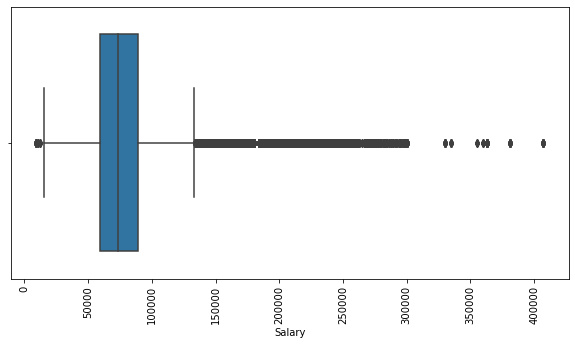

In [196]:
# Visualizamos los datos en una grafica
plt.figure(figsize=[10,5])
sns.boxplot(x='Salary', data=df_clientes)
plt.xticks(rotation=90) ;

In [197]:
# Vemos que hay bastantes valores atípicos, por lo tanto reemplazamos los nulos por la mediana (median).
df_clientes['Salary'] = df_clientes['Salary'].fillna(df_clientes['Salary'].median())

In [198]:
# Comprobamos que hemos eliminado todos los nulos del DF
df_nulos = pd.DataFrame(np.round((df_clientes.isnull().sum()/df_clientes.shape[0])*100,2), columns=['% nulos'])
print("* Los nulos que tenemos en el conjunto de datos son:")
print('')
display(df_nulos[df_nulos['% nulos']>0])

* Los nulos que tenemos en el conjunto de datos son:



,% nulos


* Continuamos explorando y cambiando los datos en aquellas columnas que creamos necesario

In [199]:
# Exploramos la columna 'Points Accumulated'. Es de tipo float y deberia de ser int
pd.DataFrame(df_clientes['Points Accumulated'])


,Points Accumulated
0,152.0
1,203.0
2,120.0
8,60.0
10,203.0
...,...
403748,298.0
403749,469.0
403750,224.0
403752,89.0


In [200]:
# Columna 'Points Accumulated'. Cambiamos a int
columna = 'Points Accumulated'
df_clientes[columna]=df_clientes[columna].astype(int)
print(df_clientes[columna].dtype)
print(df_clientes[columna].isnull().sum())

int64
0


In [201]:
# Hacemos exploracion de la estructura del DF resultante
exploracion_estructural(df_clientes)

* Este DF tiene los sigientes tipos de datos: {'object', 'int64', 'float64'}

* Típos de datos de cada columna:

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated               int64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month             

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty Number,207632.0,NaN,NaN,NaN,549240.808411,258456.99958,100018.0,326707.0,549612.0,772019.0,999986.0
Year,207632.0,NaN,NaN,NaN,2017.536295,0.498682,2017.0,2017.0,2018.0,2018.0,2018.0
Month,207632.0,NaN,NaN,NaN,6.641394,3.448752,1.0,4.0,7.0,10.0,12.0
Flights Booked,207632.0,NaN,NaN,NaN,8.03905,4.668948,1.0,4.0,8.0,11.0,21.0
Flights with Companions,207632.0,NaN,NaN,NaN,2.015706,2.538359,0.0,0.0,1.0,4.0,11.0
Total Flights,207632.0,NaN,NaN,NaN,10.054756,5.807808,1.0,6.0,10.0,14.0,32.0
Distance,207632.0,NaN,NaN,NaN,2361.633876,1135.83517,90.0,1458.0,2298.0,3150.0,6293.0
Points Accumulated,207632.0,NaN,NaN,NaN,241.592356,116.118132,9.0,149.0,235.0,323.0,676.0
Points Redeemed,207632.0,NaN,NaN,NaN,59.96854,170.314671,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,207632.0,NaN,NaN,NaN,4.853655,13.775511,0.0,0.0,0.0,0.0,71.0



* Los nulos que tenemos en el conjunto de datos son:



,% nulos


## Fase 2: Visualización

### 3. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


''

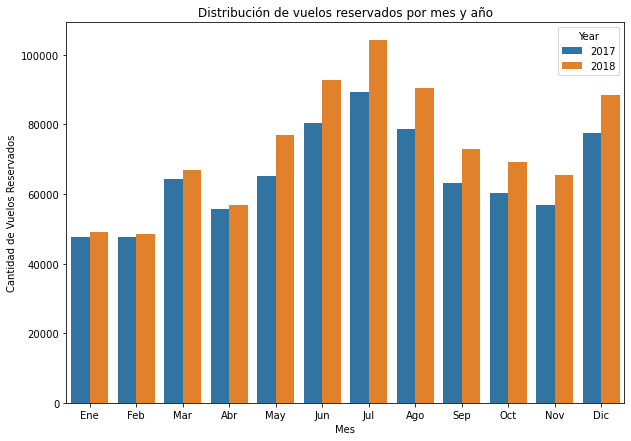

In [202]:
# Agrupamos por 'Year' y 'Month' y sumamos la cantidad de vuelos reservados cada mes
df_mes = df_clientes.groupby(['Month','Year'])['Flights Booked'].sum().reset_index()

# Le damos el tamaño que queremos a nuestra gráfica
plt.figure(figsize=[10,7])

# Visualizamos con una gráfica de barras (bar plot). 
sns.barplot(x='Month',y='Flights Booked', hue='Year',data=df_mes)

# cambiamos los nombres de los ejes
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.xticks(range(0, 12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Añadimos un titulo
plt.title('Distribución de vuelos reservados por mes y año')
;

* Conclusión: Tanto en 2017 como en 2018 se reservan más vuelos en verano y en navidades (meses de junio, julio, agosto y diciembre)

### 4. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?


''

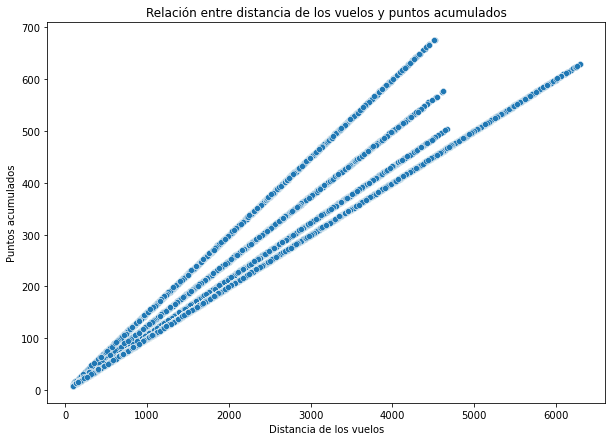

In [203]:
# Le damos el tamaño que queremos a nuestra gráfica
plt.figure(figsize=[10,7])

# Como estamos comparando dos variables numericas procedemos a visualizarlo con un 'Scatter plot'
sns.scatterplot( x='Distance', y='Points Accumulated', data=df_clientes, marker='o' )

# cambiamos los nombres de los ejes
plt.xlabel('Distancia de los vuelos')
plt.ylabel('Puntos acumulados')

# Añadimos un titulo
plt.title('Relación entre distancia de los vuelos y puntos acumulados')
;

* Conclusión: Hay una relacion directa entre estas dos variables, en concreto hay una correlacion positiva. A mayor distancia, mayor los puntos acumulados.

### 5. ¿Cuál es la distribución de los clientes por provincia o estado?

''

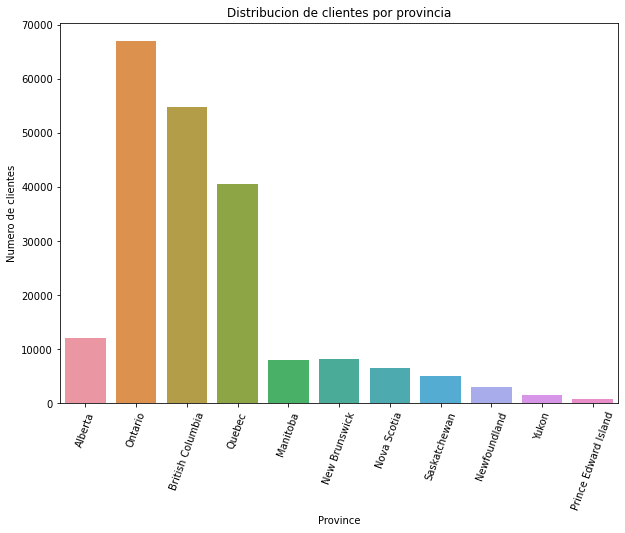

In [204]:
# Le damos el tamaño que queremos a nuestra gráfica
plt.figure(figsize=[10,7])

# Visualizamos los datos con un 'Count plot' para ver la frequencia de cada valor ya que es una variable categorica
sns.countplot( x='Province', data=df_clientes)

# cambiamos los nombres de los ejes
plt.ylabel('Numero de clientes')
plt.xticks(rotation=70)

# Añadimos un titulo
plt.title('Distribucion de clientes por provincia')
;


* Conclusión: Las provincias que claramente tienen más clientes son Ontario, British Columbia y Quebec

### 6. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?



''

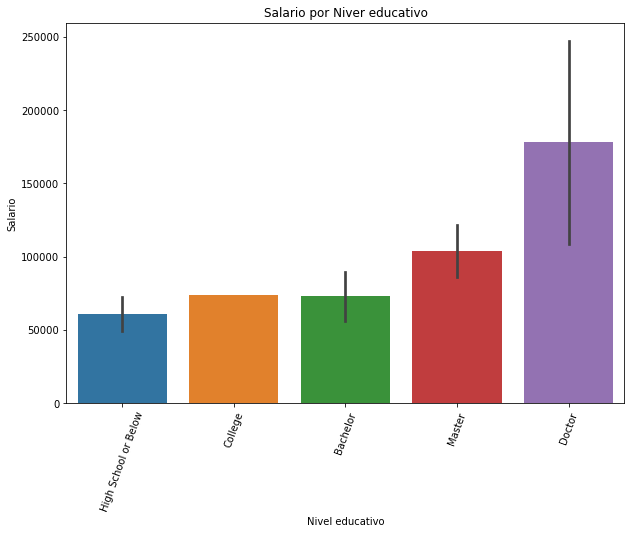

In [205]:
# Le damos el tamaño que queremos a nuestra gráfica
plt.figure(figsize=[10,7])

# Para visualizar la relación entra una variable numérica y una categórica vamos a utilizar una gráfica de barras (bar plot). 
sns.barplot(x='Education',y='Salary',data=df_clientes, order=['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'], ci='sd') 

# cambiamos los nombres de los ejes
plt.xlabel('Nivel educativo')
plt.ylabel('Salario')
plt.xticks(rotation=70)

# Añadimos un titulo
plt.title('Salario por Niver educativo')
;


* Conclusión: Los clientes que tinen un salario mas elevado son los que tienen un doctorado, seguidos por los que tienen un master con practicamente la mitad.

### 7. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


''

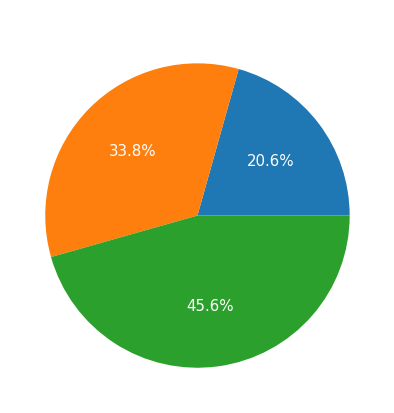

In [206]:
# Le damos el tamaño que queremos a nuestra gráfica
plt.figure(figsize=[10,7])

# Agruparemos por tipos de tarjeta y total de clientes
df_tarjeta = df_clientes.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()

# Visualizamos con una gráfica 'pie'.
plt.pie('Loyalty Number', labels= "Loyalty Card", data = df_tarjeta, autopct= '%1.1f%%', textprops={'fontsize': 15,'color':'white'})

# Añadimos un titulo
plt.title('Proporción de clientes por tarjeta de fidelidad',color='white', size=15)
;


* Conclusión: La tarjeta de fidelidad con mas clientes es la 'Star', seguida con un 11.8% menos de la tarjeta Nova

### 8. ¿Cómo se distribuyen los clientes según su estado civil y género?

''

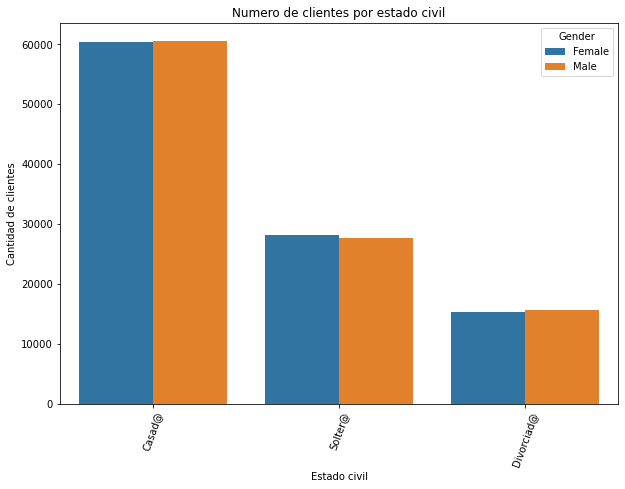

In [207]:
# Le damos el tamaño que queremos a nuestra gráfica
plt.figure(figsize=[10,7])

# Al ser una columna categorica la visualizamos con un count plot
sns.countplot(x='Marital Status', hue='Gender',data=df_clientes)

# cambiamos los nombres de los ejes
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de clientes')
plt.xticks([0,1,2], ['Casad@', 'Solter@', 'Divorciad@'], rotation=70)

# Añadimos un titulo
plt.title('Numero de clientes por estado civil')
;


* Conclusión: La mayoria de l@s clintes estan casad@s

## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Objetivo del Ejercicio:

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:


### 9. Preparación de Datos:
- Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.

In [208]:
# Creamos un DF nuevo con las columnas que nos interesan
df_educacion = df_clientes[['Flights Booked','Education']]


In [209]:
exploracion_inicial(df_educacion)

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
8,6,Bachelor
10,3,Bachelor



* El DF tiene:
 - Filas: 207632 
 - Columnas: 2

* Total de filas duplicadas: 207527

* Total de nulos en cada fila: 


Flights Booked    0
Education         0
dtype: int64

* Información general del DF:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207632 entries, 0 to 403757
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Flights Booked  207632 non-null  int64 
 1   Education       207632 non-null  object
dtypes: int64(1), object(1)
memory usage: 12.8+ MB


None

* Los valores únicos de cada una de las columnas són:

FLIGHTS BOOKED :
[ 3 10  6  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21] 

EDUCATION :
['Bachelor' 'College' 'Master' 'Doctor' 'High School or Below'] 



### 10. Análisis Descriptivo:
- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [210]:
# Para visualizar las estadisticas descriptivas basicas utilizaremos las funciones .groupny y .describe
np.round(df_educacion.groupby('Education').describe(),2)


Flights Booked                                       
                              count  mean   std  min  25%  50%   75%   max
Education                                                                 
Bachelor                   129303.0  8.03  4.67  1.0  4.0  8.0  11.0  21.0
College                     52834.0  8.07  4.67  1.0  4.0  8.0  11.0  21.0
Doctor                       9193.0  8.05  4.70  1.0  4.0  8.0  11.0  21.0
High School or Below         9855.0  8.02  4.68  1.0  4.0  8.0  11.0  21.0
Master                       6447.0  8.01  4.62  1.0  4.0  8.0  11.0  21.0

### 11. Prueba Estadística:
- Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

Primero establezemos la Hipótesis nula (H0) y la Hipótesis alternativa(H1)
- Hipótesis nula (H0): No existe diferencia significativa en el número de vuelos reservados dependiendo del nivel educativo del cliente.
- Hipótesis alternativa (H1): Si existe diferencia significativa en el número de vuelos reservados dependiendo del nivel educativo del cliente.

Para hacer A/B testing necesitamos tener dos grupos, por lo tanto agruparemos:
- Grupo A (sin estudios superiores)= 'High School or Below','College'
- Grupo B (con estudios superiores)= 'Bachelor','Master','Doctor'

In [211]:
# Creamos los dos grupos
df_A = df_educacion[(df_educacion['Education']=='High School or Below')|(df_educacion['Education']=='College')]['Flights Booked']
df_B = df_educacion[(df_educacion['Education']=='Bachelor')|(df_educacion['Education']=='Master')|(df_educacion['Education']=='Doctor')]['Flights Booked']

In [212]:
#Nos aseguramos que hemos creado los grupos bien
print(f'Num filas en df_educacion: {df_educacion.shape[0]}')
print(f'Num filas en df_A: {df_A.shape[0]}')
print(f'Num filas en df_B: {df_B.shape[0]}')

Num filas en df_educacion: 207632
Num filas en df_A: 62689
Num filas en df_B: 144943


Para comparar dos grupos y determinar si hay una diferencia significativa entre ellos realizaremos el t-test.

In [213]:
# Lo primero que tenemos que hacer para realizar el t-test es mirar si las varianzas son iguales o no
p_valor_varianza = stats.bartlett(df_A, df_B)[1]

if p_valor_varianza > 0.05:
    print(f'p_value = {np.round(p_valor_varianza,4)}. No podemos afirmar que las varianzas son diferentes entre los grupos. \nRealizar prueba t-test con equal_var = True')
else:
    print(f'p_value = {np.round(p_valor_varianza,4)}. Las varianzas son diferentes entre los grupos. \nRealizar prueba t-test con equal_var = False')

p_value = 0.953. No podemos afirmar que las varianzas son diferentes entre los grupos. 
Realizar prueba t-test con equal_var = True


In [214]:
# Realizamos el test entre los grupos
t_statistic, p_value = stats.ttest_ind(df_A, df_B, equal_var=True)


# Visualizamos los resultados para tomar una decisión basada en el valor p
alpha = 0.05  #Si el valor es menor se rechaza la hipótesis nula. 
if p_value < alpha:
    print(f'Valor de p-value: {np.round(p_value, 4)}')
    print('Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el número de vuelos reservados entre los dos grupos con distintos niveles educativos')
else:
    print(f'Valor de p-value: {np.round(p_value, 4)}')
    print('No hay suficiente evidencia para rechazar la hipótesis nula.')

Valor de p-value: 0.1429
No hay suficiente evidencia para rechazar la hipótesis nula.


* Conclusiones: No hay suficiente evidencia para determinar que el niver educativo de los clintes tenga una relacion directa con el numero de vuelos que reservan.